# Calculation of local r-process matter due to BNS mergers

The first detection of a BNS merger by LIGO presents the opportunity to compare the estimated BNS merger rates to the local r-process element abundances and attempt to answer some key questions:
* What fraction of r-process elements are produced by BNS mergers?
* How much mass is ejected from BNS mergers?
* Can we put a tighter constraint on the BNS rate by combining the LIGO observed rate with r-process abundances?

While EM observations will give the most complete picture, estimates of the ejected mass can be made with just the NS masses.  Roughly speaking, the EM observations will just give a better estimate of the ejected mass (although they could help constrain the rate as well)

## Back of the envelope
As a first step, we can estimate the r-process material density due to BNS mergers by simply counting up all the mass ejected from BNS's over the lifetime of the universe:

$$\rho_{\rm r-process} = \int_0^{t_{\rm H}} R(t)M_{\rm ej} {\rm d}t = \int_\infty^0 {\rm d}z \frac{{\rm d}t}{{\rm d}z}R(z)M_{\rm ej} =  t_{\rm H}\int_0^\infty {\rm d}z \frac{R(z)M_{\rm ej}}{(1+z)E(z)}$$

$R(z)$ is the rate density of BNS mergers, $M_{\rm ej}$ is the mass ejected from a BNS merger, and $t_{\rm H}$ is the Hubble time.

To find $R(z)$, we need a few quantities:
* The distribution of delay times $t_{\rm d}$ after birth of a binary neutron star system
* Fraction $F_{\rm BNS}$ of systems that result in BNS systems 
* The distribution of formation times of BNS systems from ZAMS
* Cosmological star formation rate 
* The local rate $R(0)$, which we get from the LIGO detection

Unfortunately, getting $R(z)$ will require a good population synthesis model, which we don't exactly have.  What we can do instead for simplicity is calculate the local r-process material production, which is naively given by

$$ \Gamma [M_\odot {\rm Gpc}^{-3} {\rm yr}^{-1}] = R(0)M_{\rm ej}$$

and assume that it is constant over some time $\Delta t$, so that 

$$\rho_{\rm r-process} = R(0)M_{\rm ej}\Delta t$$

To find $M_{\rm ej}$, we need some model that connects the values from the PE posteriors to $M_{\rm ej}$.  
We can use the models from [Dietrich et al.](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.95.024029) and use the relations from Figure 6.  For the BNS parameters, we'll just use the [initial PE results](https://ldas-jobs.ligo.caltech.edu/~carl-johan.haster/O2/G298048/inital_HLgatedV_flow24/lalinferencemcmc/IMRPhenomPv2pseudoFourPN/128s/1187008882.45-1/V1H1L1_PRELPREL_v2/posplots.html)

The relevant PE quantities are:
* $m_1 = 1.84 M_\odot$, maP
* $m_2 = 1.02M_\odot$, maP
* $M = m_1 + m_2 = 2.86M_\odot$
* $q = 0.552$, maP

Eyeballing Figure 6 of Dietrich et al., the ejected mass can be estimated as $\sim 0.04 M_\odot$.

The BNS merger rate densities calculated by Will Farr ([here](https://git.ligo.org/RatesAndPopulations/O2Populations/blob/master/bns/GW170817Rate.ipynb)) are between $360 {\rm Gpc}^{-3} {\rm yr}^{-1}$, and $4730 {\rm Gpc}^{-3} {\rm yr}^{-1}$.  Combining this with the ejecta masses from Dietrich et al. we get:

In [3]:
R_low = 360 #Gpc^-3 yr^-1
R_high = 4730 #Gpc^-3 yr^-1
M_ej = 0.04 # M_o
Gamma_low = R_low*M_ej
Gamma_high = R_high*M_ej
print('The low r-process material production rate is {:.1f} M_solar/(Gpc^3 yr) or {:.2f} M_solar/(Mpc^3 Myr)'.format(Gamma_low,Gamma_low/1e3))
print('The high r-process material production rate is {:.1f} M_solar/(Gpc^3 yr) or {:.2f} M_solar/(Mpc^3 Myr)'.format(Gamma_high,Gamma_high/1e3))

The low r-process material production rate is 14.4 M_solar/(Gpc^3 yr) or 0.01 M_solar/(Mpc^3 Myr)
The high r-process material production rate is 189.2 M_solar/(Gpc^3 yr) or 0.19 M_solar/(Mpc^3 Myr)


We'll assume that the BNS merger rate has been constant for the last 13 billion years (this is a pretty bad assumption, but just for this exercise).  Thus we get that the total r-process material mass in the galaxy is around....

In [5]:
rho_low = (Gamma_low/1e3)*13e3 # 13e3 Myr
rho_high = (Gamma_high/1e3)*13e3 # 13e3 Myr
print('low r-process density is {:e} M_solar/Mpc^3'.format(rho_low))
print('high r-process density is {:e} M_solar/Mpc^3'.format(rho_high))

low r-process density is 1.872000e+02 M_solar/Mpc^3
high r-process density is 2.459600e+03 M_solar/Mpc^3


For comparison, we can look at the total r-process mass in the galaxy of $\sim 10^4 M_\odot$, taken from a [paper by Qian](https://arxiv.org/pdf/astro-ph/0003242.pdf).  If we assume that there is one galaxy per cubic megaparsec, this estimate is of by 1 or 2 orders of magnitude. Obviously there are a *ton* of effects that haven't been taken into account.  I name some of the obvious ones here:
* The distribution of BNS merger masses
* The cosmological BNS rate density
* The full PE posteriors
* The uncertainties in ejected mass

## Putting in Cosmological Rates

Although the population synthesis models/predictions are hardly robust, we can at least attempt to build in the their results.  Here I use BNS rates I predicted using StarTrack and the M1 model of Belczynski et al. 2016, but with an extra addition:  I normalize the cosmological BNS merger rates such that the local rate density matches that predicted by LIGO.  This can obviously be done with real rate predictions that aren't totally off :)

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
import numpy as np
import seaborn as sns
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
import matplotlib
import h5py
from cycler import cycler
from scipy import stats

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
matplotlib.rcParams.update(params)

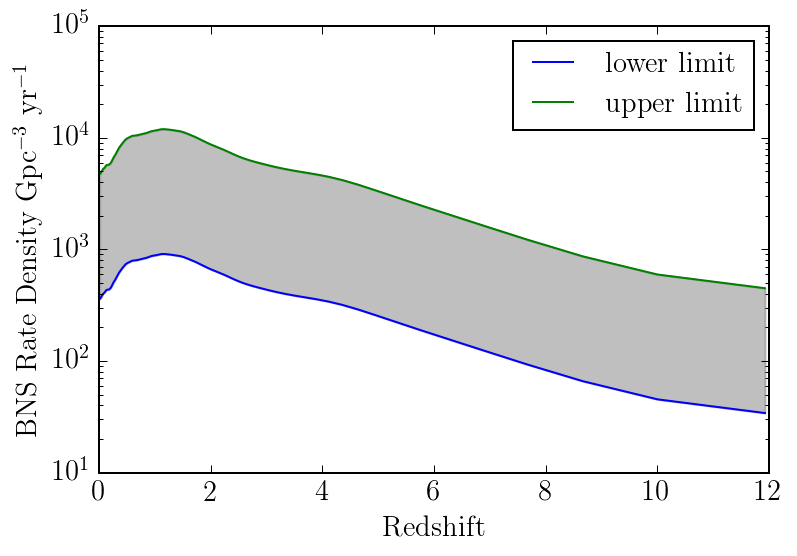

In [7]:
filename = 'BNS_rates.npy'
z_mer,rate_density = np.load(filename)
rate_density_low = rate_density*R_low/rate_density[0]
rate_density_high = rate_density*R_high/rate_density[0]
plt.plot(z_mer,rate_density_low,label='lower limit')
plt.plot(z_mer,rate_density_high,label='upper limit')
plt.fill_between(z_mer,rate_density_low,rate_density_high,color='gray',alpha=0.5)
plt.yscale('log')
plt.legend()
plt.ylabel('BNS Rate Density Gpc$^{-3}$ yr$^{-1}$')
plt.xlabel('Redshift')

In [95]:
from scipy import interpolate
from scipy import integrate

def E_of_z(z):
    O_M = 0.308
    O_L = 1.-O_M
    return np.sqrt(O_M*np.power(1.+z,3)+O_L)

# just use the lower limit rate for now and then we can multiply by a factor to get the upper limits
R_of_z = interpolate.interp1d(z_mer, rate_density_low)

def integrand(z):
    return 13e9*R_of_z(z)*M_ej/((1+z)*E_of_z(z))

rho,err = integrate.quad(integrand,min(z_mer),max(z_mer))
print('The current r-process density lower limit is {:.1e} M_solar Gpc^-3 or {:.3e} M_solar Mpc^-3'.format(rho,rho/1e9))
print('The current r-process density upper limit is {:.1e} M_solar Gpc^-3 or {:.3e} M_solar Mpc^-3'.format(R_high*rho/R_low,R_high*rho/1e9/R_low))


The current r-process density lower limit is 2.9e+11 M_solar Gpc^-3 or 2.913e+02 M_solar Mpc^-3
The current r-process density upper limit is 3.8e+12 M_solar Gpc^-3 or 3.827e+03 M_solar Mpc^-3


## Incorporating Posterior Samples

From our parameter estimations, we have an estimate of the mass ejected from the merger.  For starters, let's use the posterior samples from Michael Coughlin found [here](https://ldas-jobs.ligo.caltech.edu/~mcoughlin/gwemlightcurves/plots/BHNS_BNS_Blue/event/G298048/BNS.dat).

(570, 2)


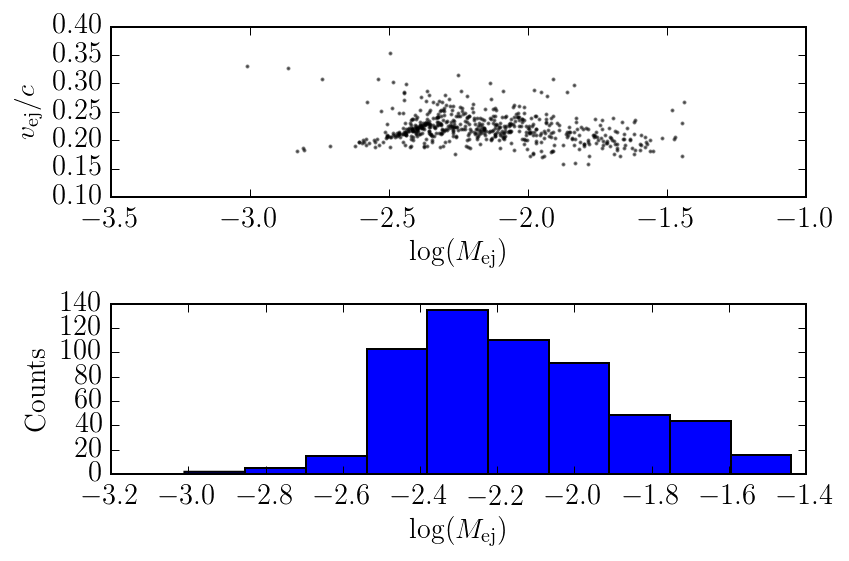

In [10]:
samples = np.genfromtxt('samples/BNS.dat',skip_header=2)
print samples.shape
M_ej_samples = samples[:,0]
v_ej_samples = samples[:,1]
fig,ax=plt.subplots(2)
ax[0].scatter(M_ej_samples,v_ej_samples,color='k',alpha=0.5,s=1)
ax[0].set_xlabel('log$(M_\mathrm{ej})$',fontsize=14)
ax[0].set_ylabel('$v_\mathrm{ej}/c$',fontsize=14)
ax[1].hist(M_ej_samples)
ax[1].set_xlabel('log$(M_\mathrm{ej})$',fontsize=14)
ax[1].set_ylabel('Counts',fontsize=14)
fig.tight_layout()

We will use these posterior samples to get a handle on the total r-process density today.  The most naive thing we can do is to take these ejecta masses and then convolve them with a cosmological rate model.  Let's do that.  A naive, but "less wrong" assumption we can use for the cosmological rate is to assume that the merger rate follows the star formation rate.  The star formation rate fit from [Madau and Dickinson 2014](https://arxiv.org/pdf/1403.0007.pdf) gives:
$$ \psi(z) = 0.015\frac{(1+z)^{2.7}}{1+[(1+z)/2.9]^{5.6}} M_\odot \mathrm{year}^{-1} \mathrm{Mpc}^{-3}.$$
We'll take this profile and assume that at $z=0$ the rate matches our inferred BNS rates.  For each posterior sample, we'll independently choose a local rate from our rate distribution, and then calculate the current r-process density.  For the rates that we will sample, we will for now assume they are pulled from a lognormal distribution with 90% intervals from $600 {\rm Gpc}^{-3} {\rm yr}^{-1}$ to $8060 {\rm Gpc}^{-3} {\rm yr}^{-1}$

In [96]:
rate_samples = []
density_samples = []
rate_loc = (np.log10(R_high) + np.log10(R_low))/2.
# Take high and low values to be 90% confidence values, ie. +/- 1.64 sigma away from mean.
# Take difference between high and low values and divide by two to find their distance to the mean
# then divide by 1.64 to go from 1.64 standard deviations to 1.
rate_sig = (np.log10(R_high) - np.log10(R_low))/2./1.64 

def R_of_z_MD(z):
    return 0.015*np.divide(np.power(1.+z,2.7),(1.+np.power((1.+z)/2.9,5.6)))

R_of_0 = R_of_z_MD(0)

# set M_ej = 1 here and then can scale later!
def integrand(z):
    return 14e9*R_of_z_MD(z)*1./((1.+z)*E_of_z(z))

density_scaled = integrate.quad(integrand,min(z_mer),max(z_mer))[0]

for Mi,M_ej_sample in enumerate(M_ej_samples):
    rate_sample = np.power(10.,np.random.normal(loc=rate_loc, scale=rate_sig))
    density_sample = density_scaled*np.power(10.,M_ej_sample)*rate_sample/R_of_0
    rate_samples.append(rate_sample)
    density_samples.append(density_sample)

rate_samples = np.array(rate_samples)
density_samples = np.array(density_samples)

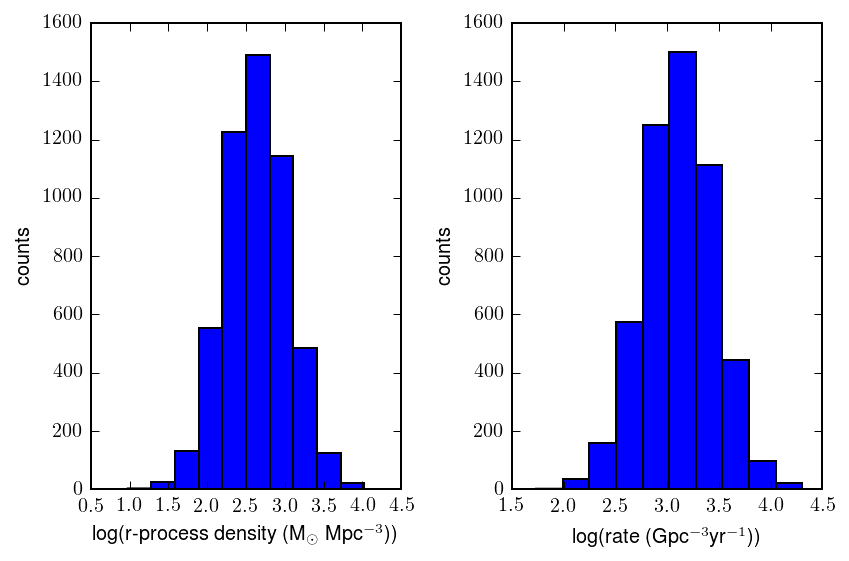

In [53]:
fig,ax = plt.subplots(1,2)
ax[0].hist(np.log10(density_samples/1e9)) 
ax[0].set_xlabel('log(r-process density (M$_\odot$ Mpc$^{-3}$))')
ax[0].set_ylabel('counts')
ax[1].hist(np.log10(rate_samples))
ax[1].set_xlabel('log(rate (Gpc$^{-3}$yr$^{-1}$))')
ax[1].set_ylabel('counts')
fig.tight_layout()

Great!  We have something that spits out sensible answers given everything else we've done so far.  Let's now generate the same data, but for all the various tidal runs to see how that affects things.  Here are the tidal runs we will use:
* [TidalP-0](https://ldas-jobs.ligo.caltech.edu/~nathan.johnson-mcdaniel/matter_postproc_output/TidalP-0/TidalP-0_ejecta_etc_samples.dat)

* [TidalP-1](https://ldas-jobs.ligo.caltech.edu/~nathan.johnson-mcdaniel/matter_postproc_output/TidalP-1/TidalP-1_ejecta_etc_samples.dat)

* [TidalP-3](https://ldas-jobs.ligo.caltech.edu/~nathan.johnson-mcdaniel/matter_postproc_output/TidalP-3/TidalP-3_ejecta_etc_samples.dat)

* [TidalP-16](https://ldas-jobs.ligo.caltech.edu/~nathan.johnson-mcdaniel/matter_postproc_output/TidalP-16/TidalP-16_ejecta_etc_samples.dat)

* Whatever run Michael Coughlin sent.

You can find out about these different runs [here](https://www.lsc-group.phys.uwm.edu/ligovirgo/cbcnote/ParameterEstimationModelSelection/O2_PE/O2/1187008882p4457#C00_Tidal_Production_PE_runs).

('m1', 'm2', 'distance', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')
('m1', 'm2', 'distance', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')


/Users/Zoheyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10


('m1', 'm2', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')
('m1', 'm2', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')
('m1', 'm2', 'distance', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')


/Users/Zoheyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in log10


('m1', 'm2', 'distance', 'lambda1', 'lambda2', 'c1', 'c2', 'r1', 'r2', 'mb1', 'mb2', 'BE1', 'BE2', 'Mej', 'Tej', 'vrho', 'vz', 'vtot')


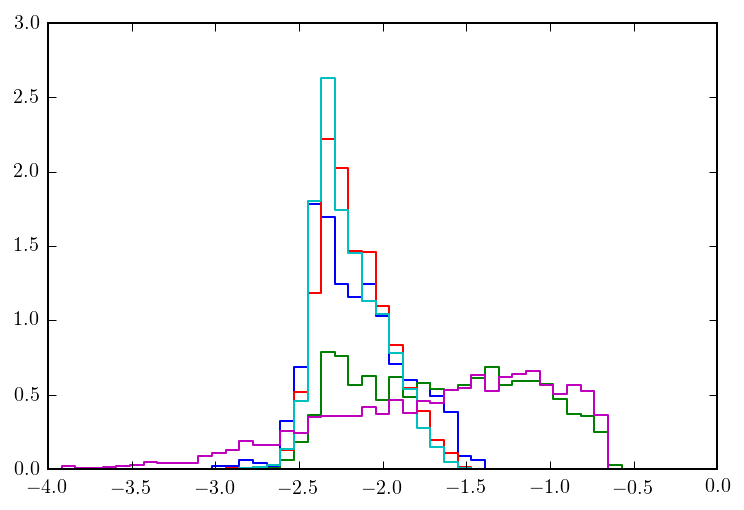

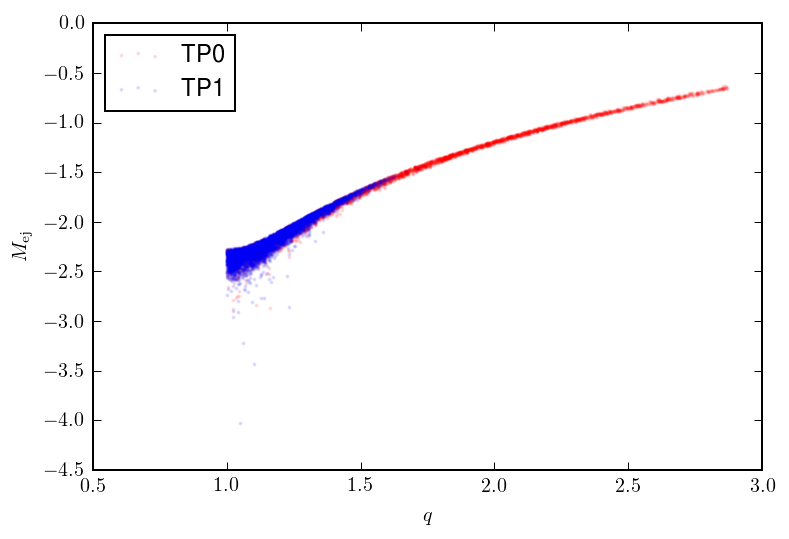

In [54]:
filenames = ['samples/BNS.dat',
            'samples/TidalP-0_0918_ejecta_etc_samples.dat',
            'samples/TidalP-1_ejecta_etc_samples.dat',
            'samples/TidalP-3_ejecta_etc_samples.dat',
            'samples/TidalP-16_ejecta_etc_samples.dat']
runnames = ['coughlin','TP0','TP1','TP3','TP16']

for ri,run in enumerate(runnames):
    rate_samples = []
    density_samples = []
    if run == 'coughlin':
        samples = np.genfromtxt(filenames[ri],skip_header=1)
        M_ej_samples = samples[:,0] 
    else:
        samples = np.genfromtxt(filenames[ri],names=True)
        print samples.dtype.names
        M_ej_samples = np.log10(samples['Mej'])
    hist,bins = np.histogram(M_ej_samples[~np.isnan(M_ej_samples)],bins=np.linspace(-4,0),density=True)
    plt.step(bins[:-1],hist,where='post')

filenames = ['samples/TidalP-0_0918_ejecta_etc_samples.dat',
            'samples/TidalP-1_ejecta_etc_samples.dat']
runnames = ['TP0','TP1']
colors = 'r','b'
plt.figure()
for ri,run in enumerate(runnames):
    rate_samples = []
    density_samples = []
    if run == 'coughlin':
        samples = np.genfromtxt(filenames[ri],skip_header=1)
        M_ej_samples = samples[:,0] 
    else:
        samples = np.genfromtxt(filenames[ri],names=True)
        print samples.dtype.names
        M_ej_samples = np.log10(samples['Mej'])
        m1_samples = samples['m1']
        m2_samples = samples['m2']
    plt.scatter(np.divide(m1_samples,m2_samples),M_ej_samples,s=1,color=colors[ri],alpha=0.1,label=runnames[ri])
plt.xlabel('$q$')
plt.ylabel('$M_\mathrm{ej}$')
plt.legend(loc=2)

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


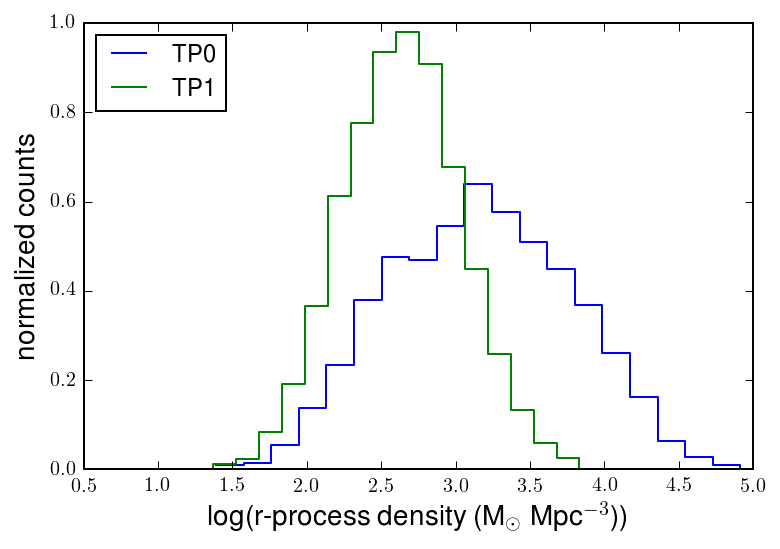

In [55]:
filenames = ['samples/TidalP-0_0918_ejecta_etc_samples.dat',
            'samples/TidalP-1_ejecta_etc_samples.dat']
runnames = ['TP0','TP1']

for ri,run in enumerate(runnames):
    rate_samples = []
    density_samples = []
    if run == 'coughlin':
        samples = np.genfromtxt(filenames[ri],skip_header=1)
        M_ej_samples = samples[:,0] 
    else:
        samples = np.genfromtxt(filenames[ri],names=True)
        M_ej_samples = np.log10(samples['Mej'])
    for Mi,M_ej_sample in enumerate(M_ej_samples):
        rate_sample = np.power(10.,np.random.normal(loc=rate_loc, scale=rate_sig))
        density_sample = density_scaled*np.power(10.,M_ej_sample)*rate_sample/R_of_0
        rate_samples.append(rate_sample)
        density_samples.append(density_sample)
    rate_samples = np.array(rate_samples)
    density_samples = np.array(density_samples)/1e9 # now in units of M_solar Mpc^-3
    hist,bins = np.histogram(np.log10(density_samples)[density_samples>0],bins=20,density=True)
    plt.step(bins[:-1],hist,where='post',label=run)
plt.xlabel('log(r-process density (M$_\odot$ Mpc$^{-3}$))',fontsize=14)
plt.ylabel('normalized counts',fontsize=14)
plt.legend(loc=2)
plt.savefig('plots/r_process_density_tidal_hist.pdf')
plt.savefig('plots/r_process_density_tidal_hist.png',dpi=400)

Let's instead calculate the abundance fraction!  Assuming a constant merger to star formation rate over cosmological time, one finds that:
$$X = \frac{M_{ej}R}{\psi(z=0)}$$
where $\psi(z)$ is the star formation rate (mass per volume per time).  We can easily compute this for our samples :)

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10


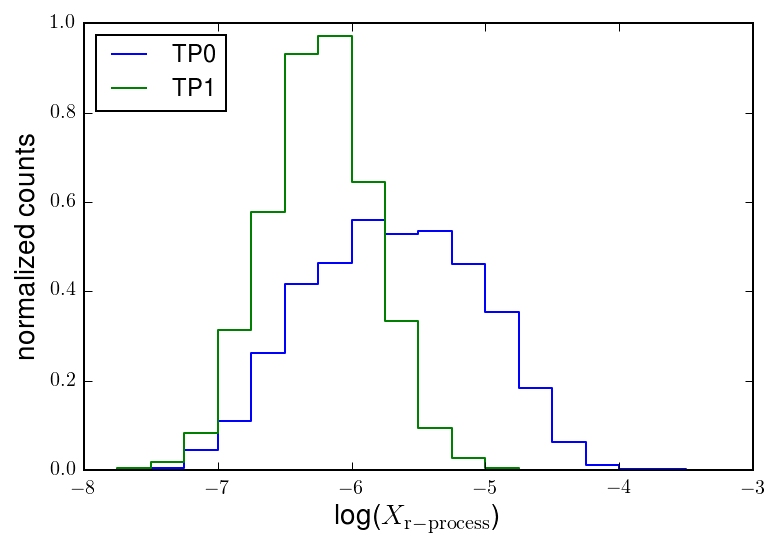

In [56]:
filenames = ['samples/TidalP-0_0918_ejecta_etc_samples.dat',
            'samples/TidalP-1_ejecta_etc_samples.dat']
runnames = ['TP0','TP1']
psi_0 = 0.015 # Madau and Dickinson local SFR in M_solar/Mpc^3/yr

for ri,run in enumerate(runnames):
    rate_samples = []
    density_samples = []
    samples = np.genfromtxt(filenames[ri],names=True)
    M_ej_samples = samples['Mej']
    rate_samples = np.power(10.,np.random.normal(loc=rate_loc, scale=rate_sig,size=len(M_ej_samples)))
    rate_samples = rate_samples/1e9 # go to cubic Mpc
    X_samples = np.multiply(M_ej_samples,rate_samples)/psi_0
    hist,bins = np.histogram(np.log10(X_samples),bins=20,density=True,range=(-8,-3))
    plt.step(bins[:-1],hist,where='post',label=run)
plt.xlabel('log($X_\mathrm{r-process}$)',fontsize=14)
plt.ylabel('normalized counts',fontsize=14)
plt.legend(loc=2)
plt.savefig('plots/r_process_X_hist.pdf')
plt.savefig('plots/r_process_X_hist.png',dpi=400)

We need to take into account the delay time distribution of NS mergers.  This is approximately the star formation rate convolved with a $t^{-1}$ delay time distribution, normalized to the local rate.  We'll use Madau and Dickinson and then convolve it with a delay time distribution going from 10My to 14000My.  Let's calculate these rates.  First we need the time as a function of distance to convert Madau and Dickinson's formula:

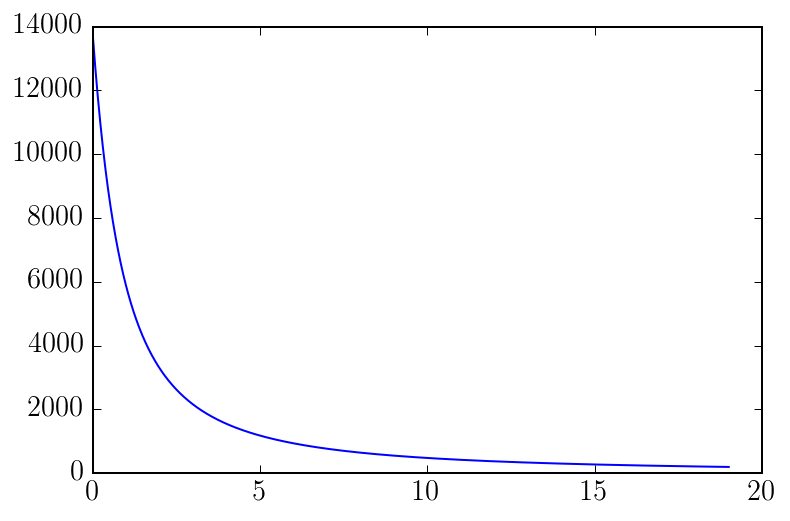

In [97]:
t_h = 14.42e3 #hubble time, Myr
def t_of_z_integrand(z):
    return t_h/((1.+z)*E_of_z(z))
z_list = np.linspace(0.,19.,1000)
t_list = []
for zi,z in enumerate(z_list):
    myt = integrate.quad(t_of_z_integrand,1000.,z)
    t_list.append(-myt[0])

plt.plot(z_list,t_list)

z_of_t = interpolate.interp1d(t_list[::-1],z_list[::-1], bounds_error=False,fill_value='extrapolate')
t_of_z = interpolate.interp1d(z_list,t_list,bounds_error=False,fill_value='extrapolate')

13799.6216536
0.128251195431


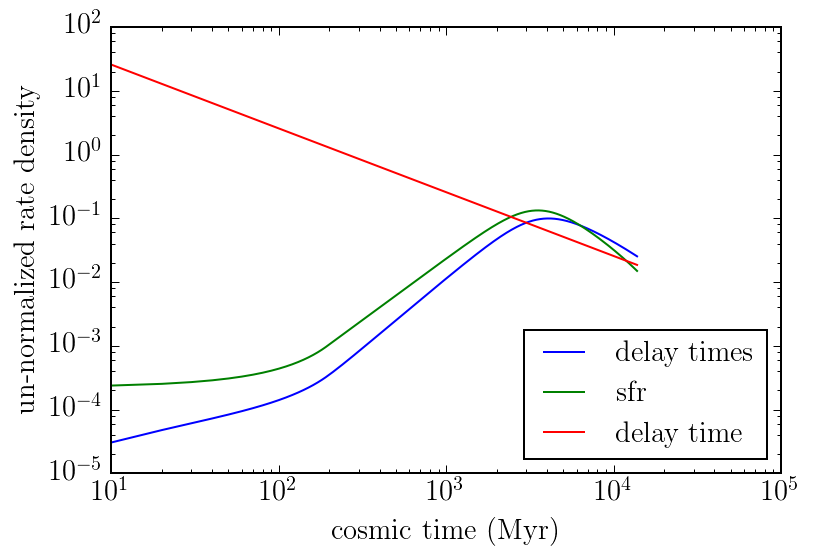

In [98]:
t_linear = np.linspace(10.,max(t_list),int((max(t_list)-10.)/10.))
print max(t_list)
R_of_t_MD = R_of_z_MD(z_of_t(t_linear))
delay_times = np.array([1./t for t in t_linear])/np.sum([1./t for t in t_linear])
print delay_times[0]
convolution = np.zeros_like(R_of_t_MD)
vect_len = len(R_of_t_MD)
for ri,R in enumerate(R_of_t_MD):
    convolution[ri:] = convolution[ri:] + R*delay_times[:vect_len-ri]
#convolution = np.convolve(R_of_t_MD,delay_times)
plt.plot(t_linear,convolution,label='delay times')
plt.plot(t_linear,R_of_t_MD,label='sfr')
plt.plot(t_linear,200.*delay_times,label='delay time')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.xlabel('cosmic time (Myr)')
plt.ylabel('un-normalized rate density')

# now convert convolution value to have rate density =1 at z=0 for easy scaling later

We can also look at the abundance fraction given the time delays.  The mathematics for that is as follows:  
$$X = \rho_\rm{r-process}/\rho_\rm{tot} = \frac{M_\rm{ej}R}{\int_0^{t_h}\psi(t)dt}\frac{\int_0^{t_h} \int_{t_{min}}^t \psi(t)p_{t_d}(t-\tau) d\tau dt}{\int_{t_{min}}^{t_H} \psi(t)p_{t_d}(t-\tau) d\tau} $$
We'll need to put in the rate, for which we'll use the rate posterior samples:

0.0253494315865


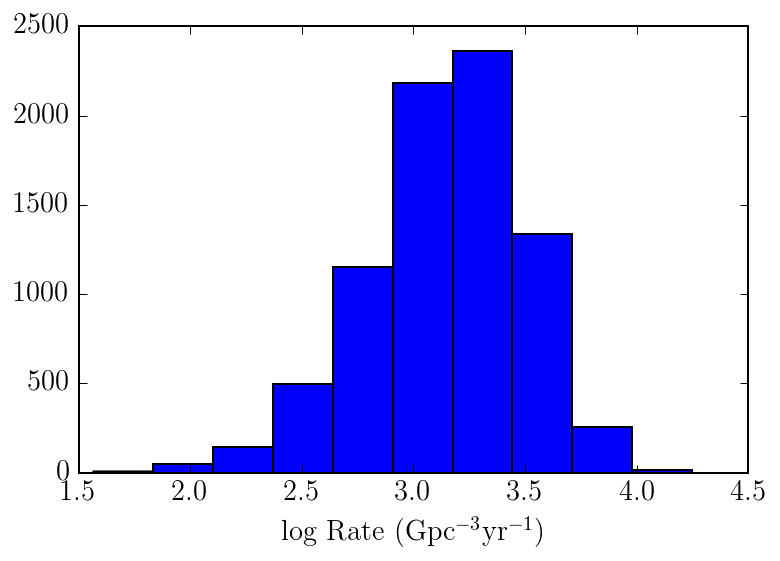

In [111]:
rate_samples = np.load('samples/chains_union.npz')
plt.hist(np.log10(rate_samples['arr_0']))
plt.xlabel('log Rate (Gpc$^{-3}$yr$^{-1}$)')
print convolution[-1]

\begin{tabular}{l*{3}{c}r}
0.14026 -7.27271381929 -5.8551198378
0.09572 -7.16284614056 -5.80146464222
0.08167 -7.11930164146 -5.78042442256
0.07807 -7.10935674092 -5.78085948353
\end{tabular}
-7.27271381929 -5.78042442256
[-0.10690574  0.89309426  1.89309426  2.89309426  3.89309426  4.89309426
  5.89309426]
8.89309426237


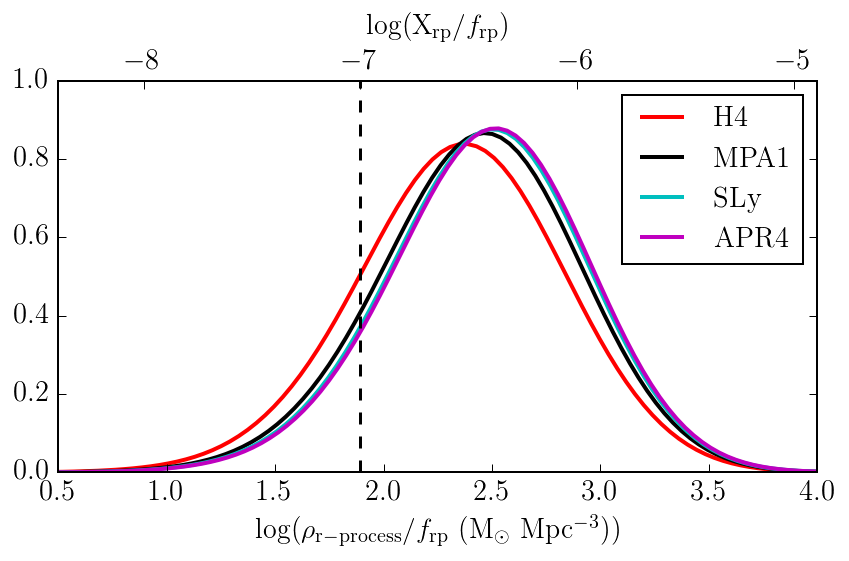

In [110]:
# filenames = ['samples/TidalP-0_0918_ejecta_etc_samples.dat',
#             'samples/TidalP-1_ejecta_etc_samples.dat']
# runnames = ['TP0','TP1']

filenames = ['samples/eos_params_tidal_prod1.h5']

#keylist = ['MS1','MS1B','H4','MPA1','SLY','AP4']
keylist = ['H4','MPA1','SLY','AP4']
namelist = ['H4','MPA1','SLy','APR4']
#keylist = ['MS1','H4','SLY']
# make a new total density that can then be scaled appropriately:
density_scaled = 1e6*np.diff(t_linear)[0]*np.sum(convolution)/convolution[-1] # 1e6 needed to go from t_linear in Myr to yr

# get the average rho from integrating star formation rate
def integrand(z):
    return 14e9*R_of_z_MD(z)*1./((1.+z)*E_of_z(z))

rho_avg = integrate.quad(integrand,min(z_mer),max(z_mer))[0] # M_solar per Mpc^3
rho_avg_log = np.log10(rho_avg)

rate_sample_npz= np.load('samples/chains_union.npz')
rate_samples = rate_sample_npz['arr_0']
rate_sample_npz.close()
mycolors = ['r','k','c','m','b','g']

print r'\begin{tabular}{l*{3}{c}r}'
for fi,filename in enumerate(filenames):
    f = h5py.File(filename, 'r')
    minLL = 100000
    maxUL = -100000
    for k,key in enumerate(keylist):
        density_samples = []
        data = f[key]
        ejecta_key = data.keys()[19]
        ejecta_masses = np.log10(np.array(list(data[ejecta_key])))
    #samples = np.genfromtxt(filenames[ri],names=True)
    #M_ej_samples = np.log10(samples['Mej'])
        for Mi,M_ej_sample in enumerate(ejecta_masses):
            density_sample = density_scaled*np.power(10.,M_ej_sample)*np.random.choice(rate_samples,5000)
            density_samples.extend(density_sample)
        density_samples = np.array(density_samples)/1e9 # now in units of M_solar Mpc^-3
        plt.figure(1)
        sns.kdeplot(np.log10(density_samples)[density_samples>0],bw=0.24,lw=2,label=namelist[k],color=mycolors[k],ls='-')
        kernel = stats.gaussian_kde(np.log10(density_samples)[density_samples>0],bw_method=0.24)
        resamples = kernel.resample(100000)
        resamples = resamples.reshape(-1)
        quantile = len(resamples[(resamples-rho_avg_log)<=-7])/float(len(resamples))
        LL = np.percentile(resamples,5)
        UL = np.percentile(resamples,95)
        minLL = min([LL,minLL])
        maxUL = max([UL,maxUL])
        median = np.percentile(resamples,50)
        print quantile,LL-rho_avg_log,UL-rho_avg_log
#         cdf = []
#         cdf_mej = np.linspace(-10.,10.,1000)
#         for val in cdf_mej:
#             cdf.append(kernel.integrate_box_1d(-10., val))
#         plt.figure(2)
#         plt.plot(cdf_mej,cdf)
#         LL = np.interp(0.05,cdf,cdf_mej)
#         UL = np.interp(0.95,cdf,cdf_mej)
        #print '%s & %2.1f, (%2.1f,%2.1f) & %2.1f, (%2.1f,%2.1f)'%(namelist[k],median,LL,UL,median-rho_avg_log,LL-rho_avg_log,UL-rho_avg_log)
    #hist,bins = np.histogram(np.log10(density_samples)[density_samples>0],bins=20,density=True)
    #plt.step(bins[:-1],hist,where='post',label=run)
print '\end{tabular}'
print minLL-rho_avg_log,maxUL-rho_avg_log
plt.figure(1)
ax = plt.gca()
ax.set_xlabel(r'log$(\rho_\mathrm{r-process}/f_\mathrm{rp}$ (M$_\odot$ Mpc$^{-3}$))',fontsize=14)
ax.set_xlim([0.5,4.0])
ax2 = ax.twiny()

abundance_ticks = np.linspace(-9.,-3,7)
new_tick_locations = abundance_ticks + np.log10(rho_avg)
print new_tick_locations
print np.log10(rho_avg)
def tick_function(X):
    V = 1/(1+X)
    return ["$%.3f$" % z for z in V]

myxticks = ax.get_xticks()

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(["$%i$" % z for z in abundance_ticks])
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel("log(X_\mathrm{rp}/f_\mathrm{rp})",fontsize=14)
plt.ylabel('normalized counts',fontsize=14)
plt.ylim([0,1.])
plt.legend(loc=2)
plt.axvline(-7+np.log10(rho_avg),color='k',lw=1.5,ls='--')
plt.tight_layout()
plt.savefig('plots/r_process_density_and_X.pdf')
plt.savefig('plots/r_process_density_and_X.png',dpi=400)

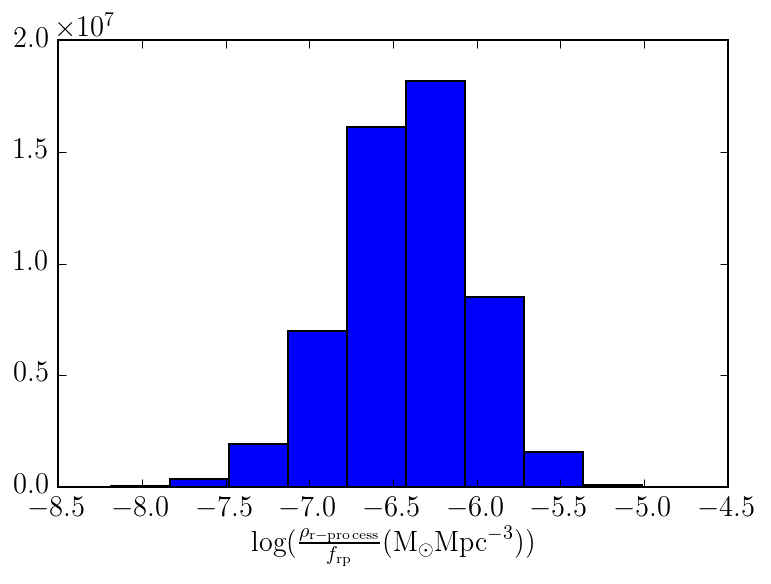

In [109]:


plt.hist(np.log10(density_samples/rho_avg))
plt.xlabel(r'$\mathrm{log}({\frac{\rho_\mathrm{r-process}}{f_\mathrm{rp}}} (\mathrm{M}_\odot \mathrm{Mpc}^{-3}))$',fontsize=14)